In [7]:
###### A1 ######
import numpy as np
import pandas as pd

# Load the dataset
file_path = "C:/Users/yuvra/Downloads/DCT_withoutduplicate 3.csv"
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
print(data.head())


class_labels = data.iloc[:, -1].unique()

# Calculate class centroids and spreads
class_centroids = {}
class_spreads = {}

for label in class_labels:
    class_data = data[data.iloc[:, -1] == label].iloc[:, :-1]
    class_centroids[label] = np.mean(class_data, axis=0)
    class_spreads[label] = np.std(class_data, axis=0)

# Calculate the Euclidean distance between the centroids of two classes
# Example: distance between the first two classes
centroid1 = class_centroids[class_labels[0]]
centroid2 = class_centroids[class_labels[1]]
distance_between_centroids = np.linalg.norm(centroid1 - centroid2)

print(f"Centroid of Class {class_labels[0]}: \n{centroid1}")
print(f"Centroid of Class {class_labels[1]}: \n{centroid2}")
print(f"Spread of Class {class_labels[0]}: \n{class_spreads[class_labels[0]]}")
print(f"Spread of Class {class_labels[1]}: \n{class_spreads[class_labels[1]]}")
print(f"Euclidean distance between centroids of Class {class_labels[0]} and Class {class_labels[1]}: {distance_between_centroids}")


             0           1           2            3           4            5  \
0  38687.88477  192.737565  188.366005  2348.285240  188.609889  3359.777672   
1  29532.98806  -54.124623  -22.492524  1648.326090   35.160362  1980.716201   
2  29511.41174  -54.495937  -25.026162  1658.645198   34.814464  2008.855279   
3  29060.40637  -19.466804  -11.668273  1487.612245    7.675333  1788.287900   
4  29039.93589  -19.725400   -9.218980  1497.054471    8.947552  1815.189691   

            6           7          8           9  ...         187         188  \
0 -454.999177 -201.722600 -42.369585 -277.176688  ...  225.163042  375.848590   
1  144.818556   38.937042  56.479929   79.150981  ... -110.815428 -112.520155   
2  145.774409   42.363949  56.631487   84.338212  ... -111.628888 -113.504989   
3   49.023922   24.901637  47.767988   42.011626  ...   -5.242054  -79.615224   
4   49.680814   22.071049  48.720409   37.361647  ...   -5.661566  -82.903805   

          189         190       

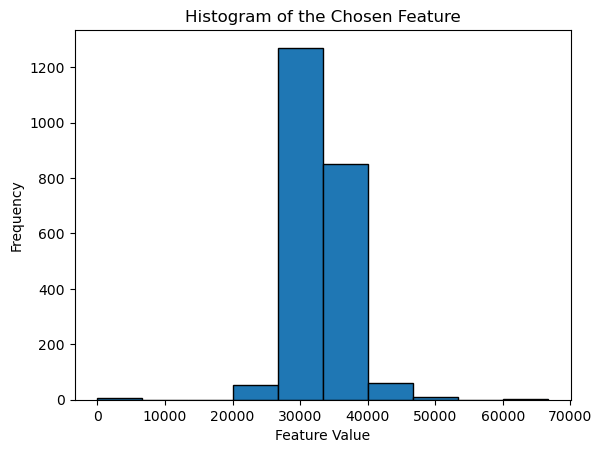

(32263.61287062666, 19621535.756842762)

In [12]:
###### A2 ######

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/yuvra/Downloads/DCT_withoutduplicate 3.csv"
data = pd.read_csv(file_path)


feature = data.iloc[:, 0]


hist, bin_edges = np.histogram(feature, bins=10)  # You can adjust the number of bins


plt.hist(feature, bins=10, edgecolor='black')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Chosen Feature')
plt.show()


mean_value = np.mean(feature)
variance_value = np.var(feature)

mean_value, variance_value


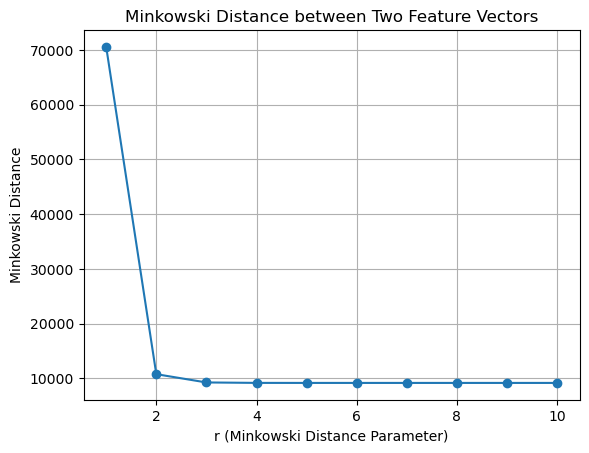

[70573.938249271,
 10753.05170474243,
 9241.241434540781,
 9160.906404968428,
 9155.410132490235,
 9154.947436594834,
 9154.90225066506,
 9154.897358440983,
 9154.896789621596,
 9154.89672011521]

In [14]:
###### A3 ######

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

# Load the dataset
file_path = "C:/Users/yuvra/Downloads/DCT_withoutduplicate 3.csv"
data = pd.read_csv(file_path)

# Choose any two feature vectors (for example, the first two rows)
feature_vector_1 = data.iloc[0, :-1]  # Excluding the label
feature_vector_2 = data.iloc[1, :-1]  # Excluding the label


r_values = np.arange(1, 11)
minkowski_distances = [minkowski(feature_vector_1, feature_vector_2, r) for r in r_values]

# Plot the distances
plt.plot(r_values, minkowski_distances, marker='o')
plt.xlabel('r (Minkowski Distance Parameter)')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.grid(True)
plt.show()

# Output the distances
minkowski_distances


In [20]:
###### A4 ######

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv( "C:/Users/yuvra/Downloads/DCT_withoutduplicate 3.csv")

# Select two classes to work with
selected_classes = [3333, 3334]

# Filter the dataset to include only the selected classes
filtered_data = data[data['LABEL'].isin(selected_classes)]


X = filtered_data.drop(columns=['LABEL'])
y = filtered_data['LABEL']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(62, 196) (27, 196) (62,) (27,)


In [22]:
###### A5 ######

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv( "C:/Users/yuvra/Downloads/DCT_withoutduplicate 3.csv")

# Select two classes to work with
selected_classes = [3333, 3334]


filtered_data = data[data['LABEL'].isin(selected_classes)]

# Split the data into features (X) and target (y)
X = filtered_data.drop(columns=['LABEL'])
y = filtered_data['LABEL']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


In [24]:
###### A6 ######
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the CSV file
file_path =  "C:/Users/yuvra/Downloads/DCT_withoutduplicate 3.csv"
data = pd.read_csv(file_path)

# Step 2: Preprocess the data (if necessary)

X = data.iloc[:, :-1]  
y = data.iloc[:, -1]   

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the kNN model
neigh = KNeighborsClassifier(n_neighbors=5)  # Default is 5 neighbors
neigh.fit(X_train, y_train)

# Step 5: Evaluate the model using the test set
accuracy = neigh.score(X_test, y_test)
print(f"Accuracy of the kNN model: {accuracy:.2f}")


Accuracy of the kNN model: 0.79


In [34]:
###### A7 ######

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path =  "C:/Users/yuvra/Downloads/DCT_withoutduplicate 3.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Assuming the last column is the target variable and the rest are features
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (k-NN works better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the k-NN classifier with k=3 (as an example)
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
neigh.fit(X_train, y_train)

# Perform prediction on a sample test vector
test_vect = X_test[0].reshape(1, -1)  # Selecting the first test vector and reshaping it
predicted_class = neigh.predict(test_vect)

# Output the predicted class
print(f'Predicted class for the test vector: {predicted_class[0]}')



             0           1           2            3           4            5  \
0  38687.88477  192.737565  188.366005  2348.285240  188.609889  3359.777672   
1  29532.98806  -54.124623  -22.492524  1648.326090   35.160362  1980.716201   
2  29511.41174  -54.495937  -25.026162  1658.645198   34.814464  2008.855279   
3  29060.40637  -19.466804  -11.668273  1487.612245    7.675333  1788.287900   
4  29039.93589  -19.725400   -9.218980  1497.054471    8.947552  1815.189691   

            6           7          8           9  ...         187         188  \
0 -454.999177 -201.722600 -42.369585 -277.176688  ...  225.163042  375.848590   
1  144.818556   38.937042  56.479929   79.150981  ... -110.815428 -112.520155   
2  145.774409   42.363949  56.631487   84.338212  ... -111.628888 -113.504989   
3   49.023922   24.901637  47.767988   42.011626  ...   -5.242054  -79.615224   
4   49.680814   22.071049  48.720409   37.361647  ...   -5.661566  -82.903805   

          189         190       

Accuracy for k=1: 0.8889
Accuracy for k=2: 0.8422
Accuracy for k=3: 0.8244
Accuracy for k=4: 0.8067
Accuracy for k=5: 0.8000
Accuracy for k=6: 0.7778
Accuracy for k=7: 0.7600
Accuracy for k=8: 0.7356
Accuracy for k=9: 0.7156
Accuracy for k=10: 0.7133
Accuracy for k=11: 0.7022


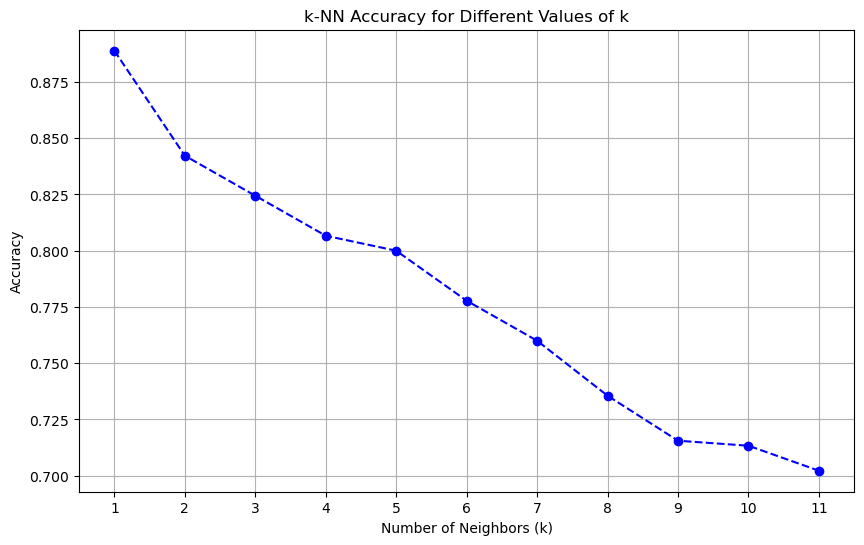

In [36]:
###### A8 ######

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
file_path =  "C:/Users/yuvra/Downloads/DCT_withoutduplicate 3.csv"
df = pd.read_csv(file_path)

# Extracting features and target variables
X = df.iloc[:, :-1]  # All columns except the last one are features
y = df.iloc[:, -1]   # The last column is the target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List to store accuracies
accuracies = []

# Loop through k values from 1 to 11
for k in range(1, 12):
    # Initialize the k-NN classifier
    neigh = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    neigh.fit(X_train, y_train)
    
    # Predict the classes for the test set
    y_pred = neigh.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy for k={k}: {accuracy:.4f}')

# Plot the accuracy as a function of k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), accuracies, marker='o', linestyle='--', color='b')
plt.title('k-NN Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()


In [40]:
###### A9 ######

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
file_path =  "C:/Users/yuvra/Downloads/DCT_withoutduplicate 3.csv"
df = pd.read_csv(file_path)

# Extracting features and target variables
X = df.iloc[:, :-1]  # All columns except the last one are features
y = df.iloc[:, -1]   # The last column is the target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the k-NN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
neigh.fit(X_train, y_train)

# Predictions on training and test data
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

# Confusion Matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix - Training Data:')
print(conf_matrix_train)

# Confusion Matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print('\nConfusion Matrix - Test Data:')
print(conf_matrix_test)

# Classification Report for training data with zero_division=1 to handle undefined metrics
class_report_train = classification_report(y_train, y_train_pred, zero_division=1)
print('\nClassification Report - Training Data:')
print(class_report_train)

# Classification Report for test data with zero_division=1 to handle undefined metrics
class_report_test = classification_report(y_test, y_test_pred, zero_division=1)
print('\nClassification Report - Test Data:')
print(class_report_test)



Confusion Matrix - Training Data:
[[43  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 38 ...  0  0  0]
 ...
 [ 0  0  0 ... 40  0  2]
 [ 0  0  0 ...  0 41  0]
 [ 0  0  0 ...  0  0 37]]

Confusion Matrix - Test Data:
[[ 7  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 13  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  2]]

Classification Report - Training Data:
              precision    recall  f1-score   support

        3333       0.93      1.00      0.97        43
        3334       1.00      1.00      1.00        30
        3335       0.95      0.93      0.94        41
        3337       0.94      0.97      0.95        30
        3342       0.98      1.00      0.99        40
        3346       0.95      1.00      0.97        37
        3349       0.97      0.95      0.96        61
        3351       0.61      0.65      0.62        31
        3352       0.54      0.57      0.55        23
        3353       0.94      1.00      0.9